<div style="background-color:#B43757; color:white; padding:15px;">
<h1> HOW TEMPORAL EXPECTATIONS (Short vs Long) IMPACT NEURAL DYNAMICS
<left>
</div>

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc
import numpy as np
import mat73

In [2]:
sns.set(font='DejaVu Sans',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'grid.color': '.8',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":10,
                                "axes.titlesize":12,
                                "axes.labelsize":10})
sns.set_palette("colorblind")

In [3]:
def abline(slope, intercept, **kwargs):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

In [88]:
def abline_ax(slope, intercept, i, j, **kwargs):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax_array[i][j].plot(x_vals, y_vals, '--', **kwargs)

In [4]:
# Load data set
allData = mat73.loadmat('./RSG-spikepatterns/Data/G_Ready-Set_bin1ms_alignedReady.mat')
# data = mat73.loadmat('./RSG-spikepatterns/Data/H_Ready-Set_bin1ms_alignedReady.mat')

In [5]:
allData.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s', 'wbin'])

In [6]:
sessions = len(allData['D'])
session = 0
nTime, nNeurons, nTrials = allData['D'][session].shape

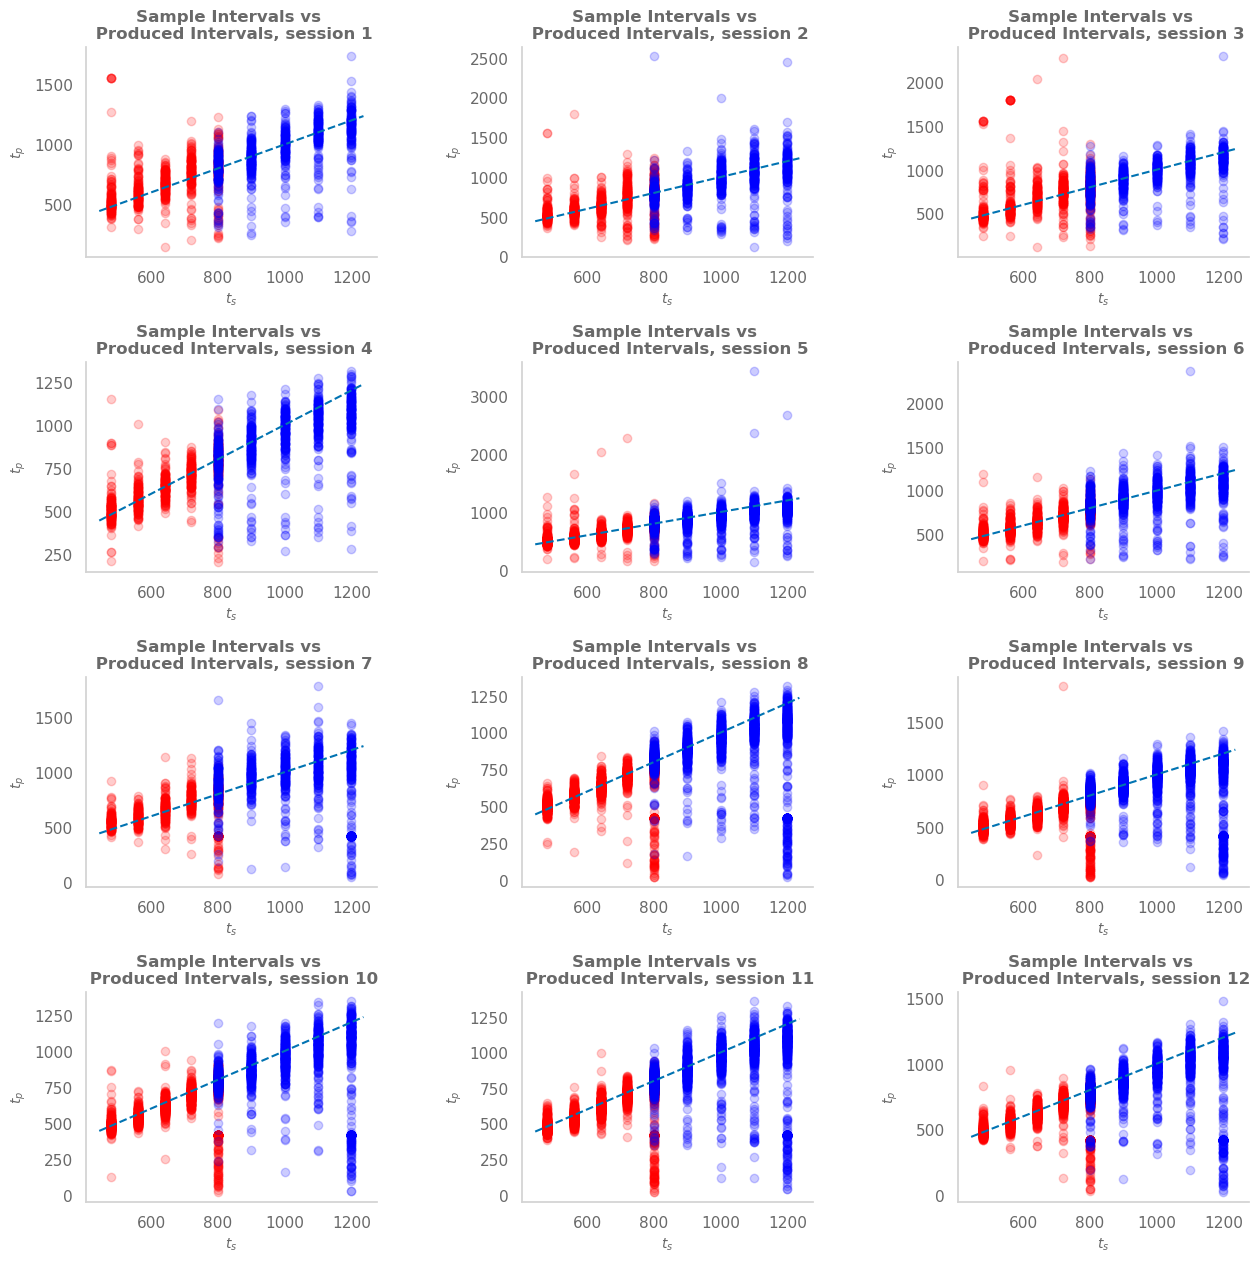

In [214]:
fig, ax_array = plt.subplots(4, 3, figsize=(15, 15))#, squeeze = False)
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i, ax_row in enumerate(ax_array):
    for j, axes in enumerate(ax_row):
        session = i*3 + j
        #####
        ## Unity line
        axes_ = np.array([min(allData['t_s'][session][allData['id_short'][session]]), max(allData['t_s'][session][allData['id_short'][session] == False])])
        intercept, slope = 0, 1
        y_vals = intercept + slope * x_vals
        ax_array[i][j].plot(x_vals, y_vals, '--')
        #####
        ## Scatter the data
        ax_array[i][j].scatter(allData['t_s'][session][allData['id_short'][session]], allData['t_p'][session][allData['id_short'][session]], 
            color = 'red', alpha = 0.2, label = 'Short')
        ax_array[i][j].scatter(allData['t_s'][session][allData['id_short'][session] == False], allData['t_p'][session][allData['id_short'][session] == False], 
            color = 'blue', alpha = 0.2, label = 'Long')
        ax_array[i][j].set_title('Sample Intervals vs \n Produced Intervals, session {}'.format(session + 1), fontweight = 'bold')
        ax_array[i][j].set_xlabel('$t_s$')
        ax_array[i][j].set_ylabel('$t_p$')
        
        #neuron = (10 * i) + j
    

## Trial average activity as a function of time

Data is encoded in a tensor as follows:

`time x neurons x trials`

for session 1:

`1200 x 107 x 1498`

Supposed to be `[TxNxK]`, the spiking activity of **N** neurons, across **K** trials and **T** times points.

In [379]:
dt = 100

timepoints = np.arange(dt, t_s_max + 1, dt, dtype = int)

shortTimes = timepoints[timepoints < 800] # np.array([480, 560, 640, 720, 800])
longTimes = timepoints # np.array([800, 900, 1000, 1100, 1200])

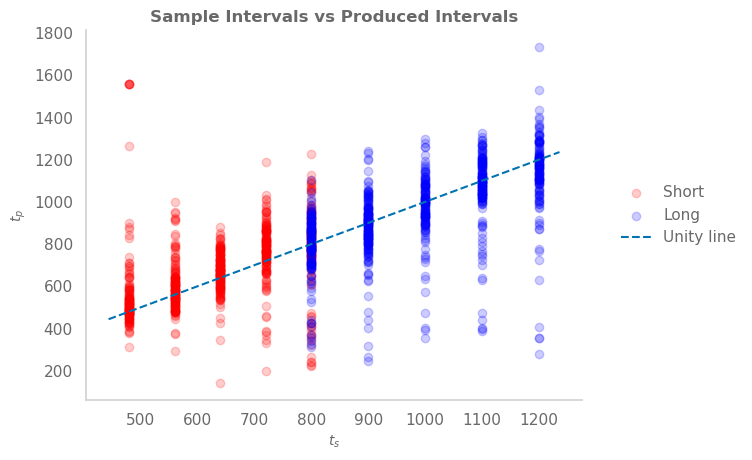

In [8]:
plt.scatter(allData['t_s'][session][allData['id_short'][session]], allData['t_p'][session][allData['id_short'][session]], 
            color = 'red', alpha = 0.2, label = 'Short')
plt.scatter(allData['t_s'][session][allData['id_short'][session] == False], allData['t_p'][session][allData['id_short'][session] == False], 
            color = 'blue', alpha = 0.2, label = 'Long')
abline(1, 0, label = 'Unity line')
plt.title('Sample Intervals vs Produced Intervals', fontweight = 'bold')
plt.xlabel('$t_s$')
plt.ylabel('$t_p$')
plt.legend(frameon = False, loc = 'center left', bbox_to_anchor = (1.05, 0.5))
plt.show()

In [372]:
session = 0
shortMask = allData['id_short'][session]
longMask = allData['id_short'][session] == False

In [373]:
allData['D'][session].shape

(1200, 107, 1498)

In [374]:
# Subset Data according to short or long ts

#### Short
shortData = allData['D'][session][:, :, shortMask][:800, :, :]

#### Long
longData = allData['D'][session][:, :, longMask]

In [375]:
# Average data across trials
shortData_mean = np.nanmean(shortData, axis = 2)  ## Slice at time 800 since after that, there are no data -> NaN's
longData_mean = np.nanmean(longData, axis = 2)

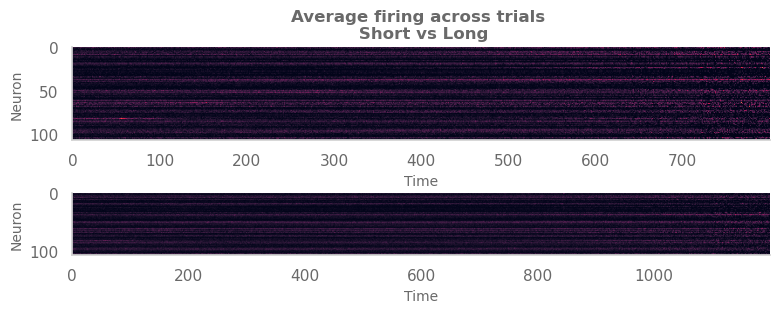

In [239]:
fig = plt.figure(figsize = (9,3))
fig.subplots_adjust(hspace = 0.3)

plt.subplot(211)
plt.imshow(shortData_mean.T)
plt.title('Average firing across trials \n Short vs Long', fontweight = 'bold')
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.subplot(212)
plt.imshow(longData_mean.T)
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.show()

In [380]:
spikes_short_df = {}
spikes_long_df = {}

for start in shortTimes:
    spikes_short_df[start] = shortData_mean[start - dt: start, :].mean(axis = 0) * 1000 # 0 - avgTime 

for start in longTimes:
    spikes_long_df[start] = longData_mean[start - dt: start, :].mean(axis = 0) * 1000 # 1 - avgNeuronActivity
    
spikes_short_df = pd.DataFrame(spikes_short_df)
spikes_long_df = pd.DataFrame(spikes_long_df)

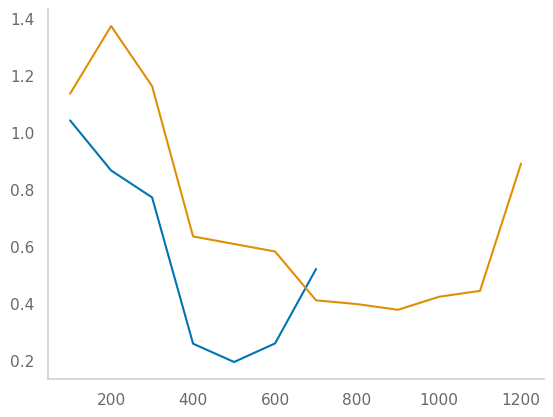

In [381]:
neuron = 0
plt.plot(shortTimes, spikes_short_df.T[neuron])
plt.plot(longTimes, spikes_long_df.T[neuron])

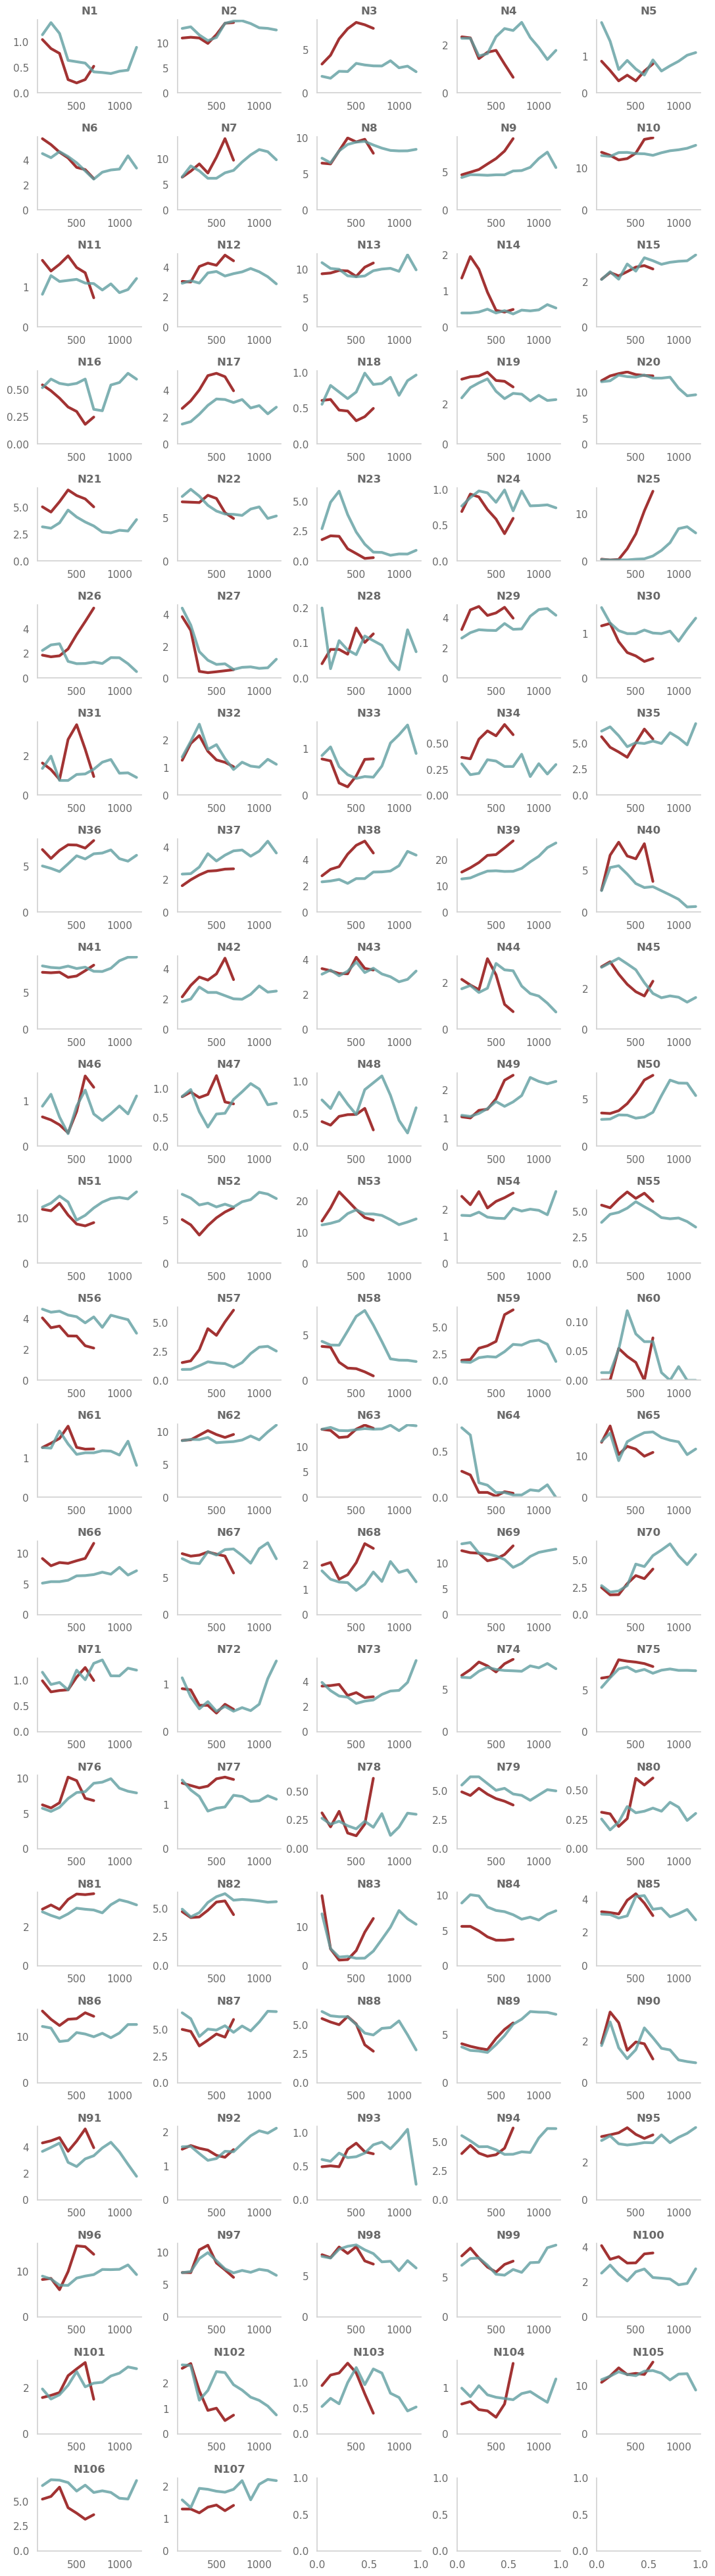

In [385]:
N_neurons_cols = int(np.sqrt(nNeurons)/2)
# fig, axs = plt.subplots(nNeurons // N_neurons_cols, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))

fig, axs = plt.subplots(22, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)
for neuron, ax in enumerate(axs.ravel()):
    if neuron > nNeurons - 1:
        break
    ax.plot(shortTimes, spikes_short_df.T[neuron], color = 'darkred', alpha = 0.8, linewidth = 3)
    ax.plot(longTimes, spikes_long_df.T[neuron], color = 'cadetblue', alpha = 0.8, linewidth = 3)
    # ax.plot(timepoints, np.nanmean(fr[:, i_neuron, longMask], axis = -1), 'b')
    ax.set_title('N{}'.format(neuron + 1), fontweight = 'bold')
    ax.set_ylim(0)

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

In [386]:
DeltaT = 100 # number of time bins on which we average
dt = 60 # temporal distance between points on which we compute the firing rate

t_s_max = np.max(allData['t_s'][session])
timepoints = np.arange(DeltaT, t_s_max + 1, dt, dtype = int)
N_timepoints = len(timepoints)
timepoints

array([ 100,  160,  220,  280,  340,  400,  460,  520,  580,  640,  700,
        760,  820,  880,  940, 1000, 1060, 1120, 1180])

In [318]:
data.shape

(1200, 107, 1498)

In [319]:
fr = np.empty((N_timepoints, nNeurons, nTrials)) * np.nan
for i_timepoint, timepoint in enumerate(timepoints):
    fr[i_timepoint, :, :] = np.nansum(data[(timepoint - DeltaT) : timepoint, :, :], axis = 0) / (DeltaT/1000)

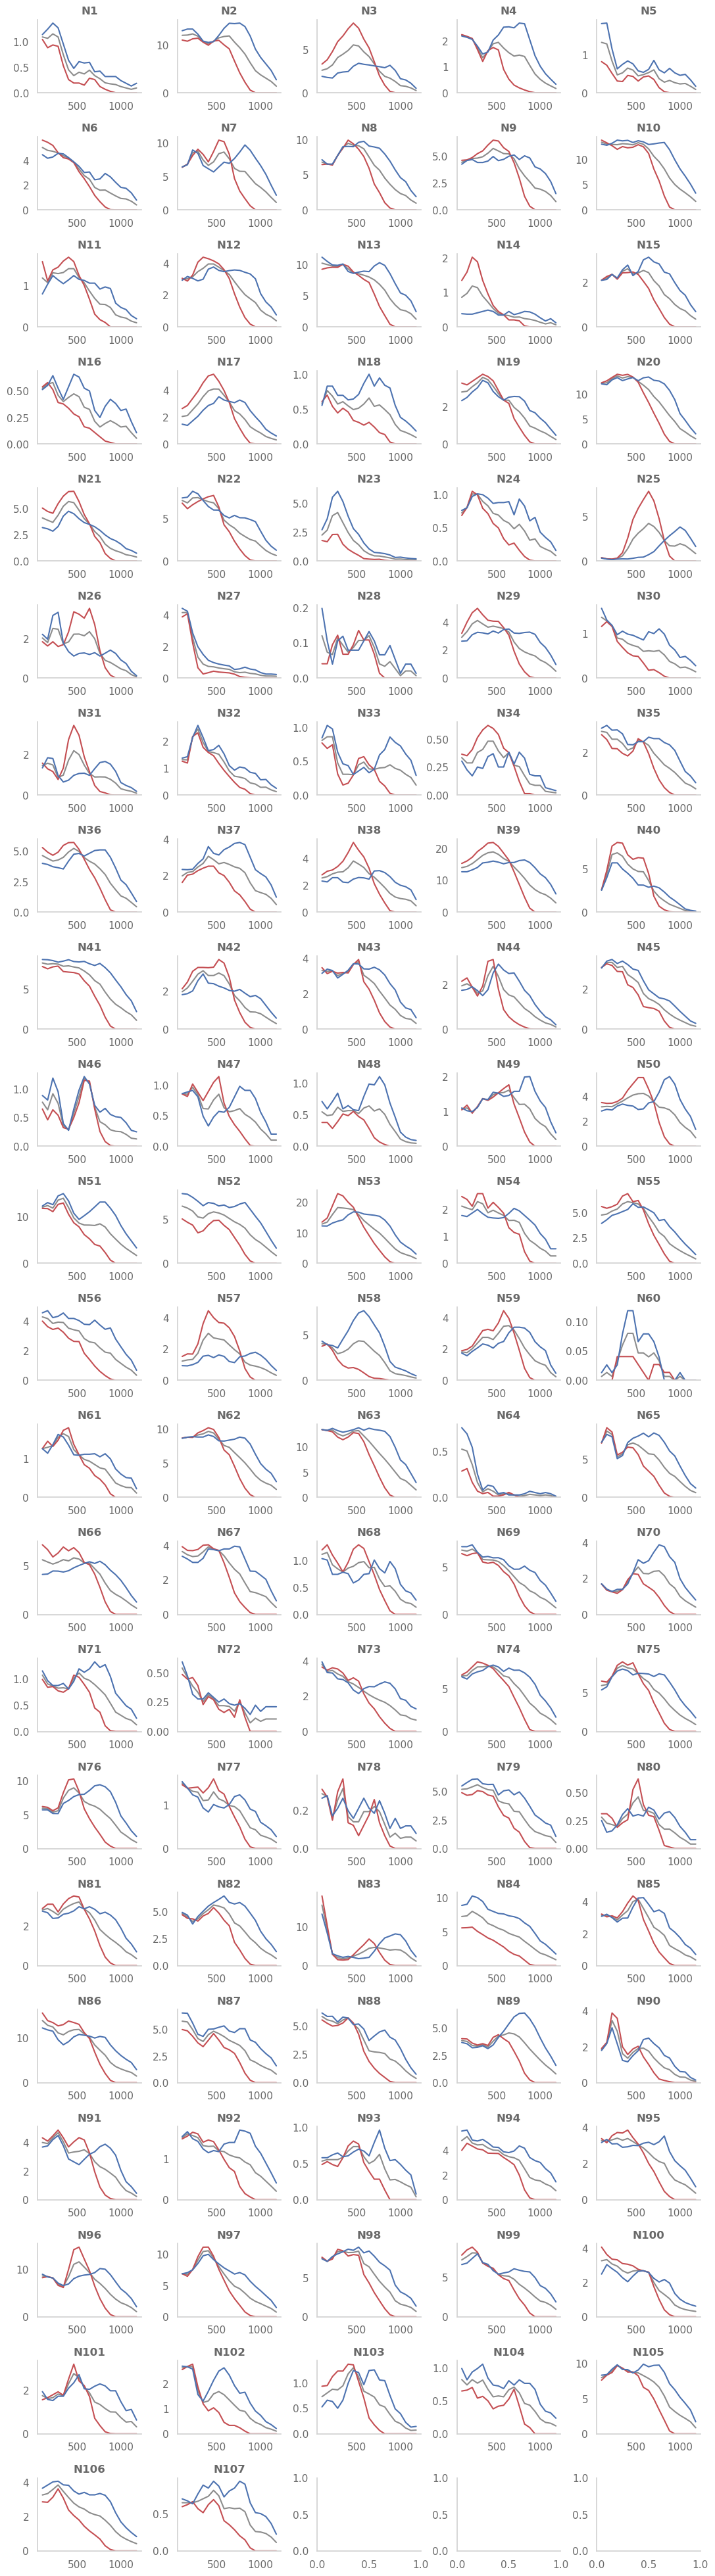

In [320]:
N_neurons_cols = int(np.sqrt(nNeurons)/2)
# fig, axs = plt.subplots(nNeurons // N_neurons_cols, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))

fig, axs = plt.subplots(22, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)
for i_neuron, ax in enumerate(axs.ravel()):
    if i_neuron > nNeurons - 1:
        break
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, :], axis = -1), 'k', alpha=.5)
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, shortMask], axis = -1), 'r')
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, longMask], axis = -1), 'b')
    ax.set_title('N{}'.format(i_neuron + 1), fontweight = 'bold')
    ax.set_ylim(0)

In [321]:
fr.shape

(19, 107, 1498)

In [322]:
timepoints

array([ 100,  160,  220,  280,  340,  400,  460,  520,  580,  640,  700,
        760,  820,  880,  940, 1000, 1060, 1120, 1180])

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

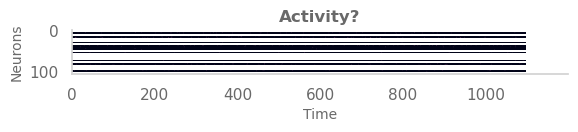

In [10]:
plt.imshow(allData['D'][session][:, :, 0].T)
plt.ylabel('Neurons')
plt.xlabel('Time')
plt.title('Activity?', fontweight = 'bold')
plt.show()

In [11]:
for iSession in range(sessions):
    print(iSession, np.nanmax(allData['D'][iSession]))

0 19.0
1 3.0
2 3.0
3 3.0
4 5.0
5 2.0
6 4.0
7 3.0
8 4.0
9 3.0
10 3.0
11 3.0


**Make a summary plot with a subplot for each neuron showing the trial-averaged activity of the neuron as a function of time. Use 20-ms non-overlapping windows to bin the spikes**

In [12]:
data = allData['D'][session]

In [34]:
data.shape

(1200, 107, 1498)

In [25]:
np.nanmean(data[:, 0, :], axis = 1)

array([0.        , 0.00066756, 0.00333778, ..., 0.        , 0.00740741,
       0.        ])

In [33]:
np.nansum((data[:, 0, 2]))

0.0

In [ ]:
# Why two sequential trimming 

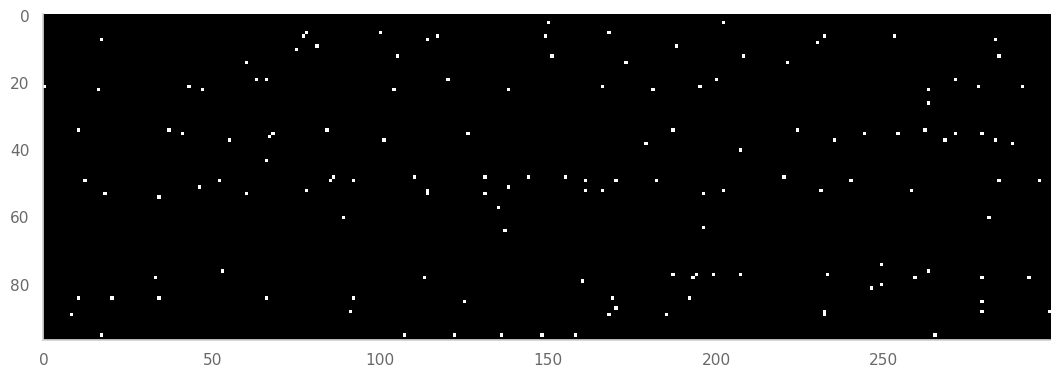

In [40]:
i_trial = 5
data_trimT = data[np.isnan(data[:, :, i_trial]).sum(axis=1) < nNeurons, :, i_trial]
data_trimT.shape

data_trim = data_trimT[:, np.isnan(data_trimT).sum(axis=0)==0]
data_trim.shape

fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow((data_trim>0)[:300, :].T, cmap='gray');